In [1]:
import torch
import numpy as np  # 直接导入numpy获取版本
import ultralytics
from ultralytics import YOLO

# 打印环境信息（修正NumPy版本获取方式）
print("Python路径：", torch.__file__.rsplit('/', 2)[0] + '/python')
print("NumPy版本：", np.__version__)  # 正确的NumPy版本获取方式
print("ultralytics版本：", ultralytics.__version__)
print("PyTorch版本：", torch.__version__)

# 核心修复：将DetectionModel加入PyTorch安全全局列表（信任模型源时使用）
torch.serialization.add_safe_globals([ultralytics.nn.tasks.DetectionModel])

# 加载YOLOv5轻量版模型（推荐yolov5su.pt，适配性更好）
try:
    model = YOLO('yolov5su.pt')  # 若本地无模型，会自动下载官方权重
    print("✅ YOLOv5轻量版加载成功！")
except Exception as e:
    # 备选方案：关闭weights_only限制（仅信任模型源时使用）
    print(f"⚠️  首次加载失败：{e}")
    print("🔧 尝试备选方案加载...")
    import ultralytics.engine.model
    # 临时修改torch.load的默认参数
    original_load = torch.load
    def custom_load(*args, **kwargs):
        kwargs['weights_only'] = False  # 关闭权重仅加载限制
        return original_load(*args, **kwargs)
    torch.load = custom_load
    
    # 重新加载模型
    model = YOLO('yolov5su.pt')
    torch.load = original_load  # 恢复原函数
    print("✅ YOLOv5轻量版加载成功（备选方案）！")

# 测试模型（可选）
#results = model('https://ultralytics.com/images/zidane.jpg')  # 测试图片
#print(f"📊 模型推理完成，检测到 {len(results[0].boxes)} 个目标")

Python路径： /Users/limengyan/anaconda3/envs/yolov5_env/lib/python3.10/site-packages/python
NumPy版本： 1.26.4
ultralytics版本： 8.0.224
PyTorch版本： 2.9.1
⚠️  首次加载失败：Weights only load failed. This file can still be loaded, to do so you have two options, do those steps only if you trust the source of the checkpoint. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL torch.nn.modules.container.Sequential was not an allowed global by default. Please use `torch.serialization.add_safe_globals([torch.nn.modules.container.Sequential])` or the `torch.serialization.safe_globals([torch.nn.

In [ ]:
import torch
import warnings

# 忽略无关警告
warnings.filterwarnings('ignore')

# 正确重写 torch.load，强制设置 weights_only=False
original_torch_load = torch.load
def safe_torch_load(f, map_location=None, weights_only=False, **kwargs):
    # 强制将 weights_only 设置为 False，其他参数保持不变
    return original_torch_load(f, map_location=map_location, weights_only=False, **kwargs)

# 替换原有的 torch.load
torch.load = safe_torch_load

# ========== 以下是你的原有代码 ==========
from ultralytics import YOLO
import os

def train_yolov5s(yaml_path, epochs=3, batch_size=8, imgsz=224):
    """
    训练YOLOv5s模型
    """
    # 加载YOLOv5s预训练模型（轻量版）
    model = YOLO('yolov5su.pt')
    
    # 开始训练
    results = model.train(
        data=yaml_path,
        epochs=epochs,
        batch=batch_size,
        imgsz=imgsz,
        device=0 if torch.cuda.is_available() else 'cpu',  # 自动选择GPU/CPU
        patience=5,  # 早停耐心值
        save=True,   # 保存最佳模型
        project='runs/train',
        name='makeup_model',
        exist_ok=True
    )
    
    # 返回最佳模型路径
    best_model_path = os.path.join(results.save_dir, 'weights', 'best.pt')
    return best_model_path

# 你的数据集配置路径
yaml_path = "YOLO_Makeup_Dataset/dataset.yaml"

# 训练模型
best_model_path = train_yolov5s(yaml_path, epochs=3, batch_size=8, imgsz=224)
print(f"训练完成！最佳模型路径：{best_model_path}")

New https://pypi.org/project/ultralytics/8.3.250 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.224 🚀 Python-3.10.19 torch-2.9.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov5su.pt, data=YOLO_Makeup_Dataset/dataset.yaml, epochs=10, patience=5, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=runs/train, name=makeup_model, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /Users/limengyan/Downloads/YOLO_Makeup_Dataset/train/labels.cach
val: Scanning /Users/limengyan/Downloads/YOLO_Makeup_Dataset/val/labels.cache...


Plotting labels to runs/train/makeup_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/train/makeup_model
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.2443     0.7405     0.9648          3        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        767        767      0.838      0.882      0.869      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.1939     0.5392     0.9269          3        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        767        767      0.863      0.881      0.937      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.1644     0.4857     0.9231          3        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        767        767      0.877      0.838      0.938      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.1256     0.4218     0.9162          3        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        767        767      0.866      0.849      0.931      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.1283     0.4205     0.9131          3        224: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        767        767      0.905      0.893       0.96      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      0.115     0.3771      0.917          8        224:  

In [1]:
from ultralytics import YOLO

# 加载YOLOv8n模型
model = YOLO("yolov8n.pt")

# 打印模型信息，验证加载成功
print("模型加载成功！")
print(f"模型类型: {type(model)}")

模型加载成功！
模型类型: <class 'ultralytics.models.yolo.model.YOLO'>


In [2]:
img_path = 'zidane.jpg'  
results = model(img_path)


image 1/1 /Users/limengyan/Downloads/zidane.jpg: 384x640 2 persons, 1 tie, 61.3ms
Speed: 4.8ms preprocess, 61.3ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)


In [3]:
# 可视化检测结果（会弹出带标注框的图片）
results[0].show()
# 保存标注后的图片到本地
results[0].save(filename='zidane_detected.jpg')
# 打印详细的检测信息
print(results[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0., 27.])
conf: tensor([0.8360, 0.8190, 0.2910])
data: tensor([[1.1487e+02, 1.9741e+02, 1.1145e+03, 7.1189e+02, 8.3597e-01, 0.0000e+00],
        [7.4846e+02, 4.1855e+01, 1.1431e+03, 7.1302e+02, 8.1896e-01, 0.0000e+00],
        [4.3947e+02, 4.3707e+02, 5.2435e+02, 7.0916e+02, 2.9097e-01, 2.7000e+01]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[614.6693, 454.6507, 999.5989, 514.4774],
        [945.7686, 377.4396, 394.6143, 671.1689],
        [481.9103, 573.1166,  84.8712, 272.0862]])
xywhn: tensor([[0.4802, 0.6315, 0.7809, 0.7146],
        [0.7389, 0.5242, 0.3083, 0.9322],
        [0.3765, 0.7960, 0.0663, 0.3779]])
xyxy: tensor([[ 114.8699,  197.4120, 1114.4688,  711.8894],
        [ 748.4614,   41.8551, 1143.0757,  713.0240],
        [ 439.4747,  437.0735,  524.3459,  709.1597]])
xyxyn: tensor([[0.0897, 0.2742, 0.8707, 0.9887],
        [0.5847, 0.0581, 0.8930, 0.99

In [4]:
model = YOLO("yolov8n-seg.pt") 

100%|██████████████████████████████████████| 6.74M/6.74M [02:15<00:00, 52.1kB/s]


In [5]:
img_path = "zidane.jpg"

# 执行分割推理（conf=0.25过滤低置信度结果，避免干扰）
results = model(img_path, conf=0.25)

# 提取第一张图的分割结果
result = results[0]



image 1/1 /Users/limengyan/Downloads/zidane.jpg: 384x640 2 persons, 1 tie, 94.2ms
Speed: 5.2ms preprocess, 94.2ms inference, 12.2ms postprocess per image at shape (1, 3, 384, 640)


In [11]:
results[0].show()

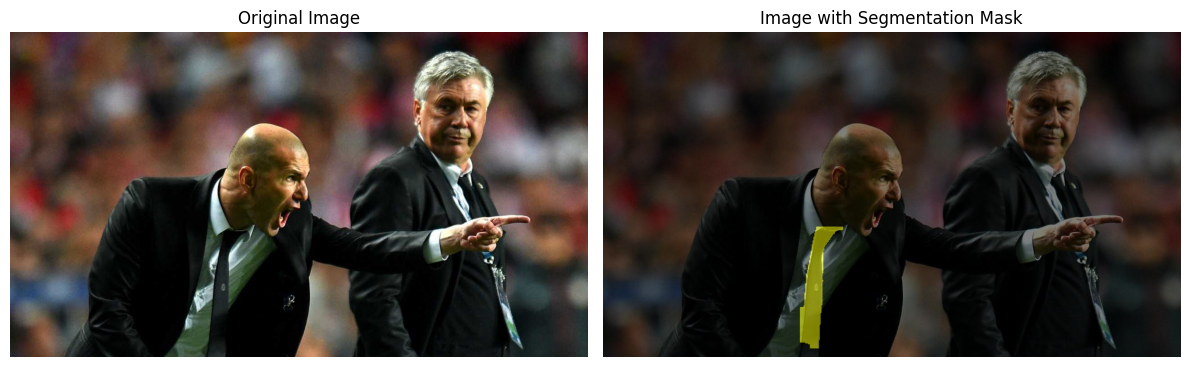

In [10]:
# 3. 读取原始图片并转换颜色空间（OpenCV默认BGR，matplotlib用RGB）
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 4. 创建掩码画布（与原图大小相同，初始全黑）
mask_overlay = np.zeros_like(img_rgb)

# 5. 遍历所有检测结果，绘制分割掩码
if result.masks is not None:
    # 获取所有掩码和对应的类别ID
    masks = result.masks.data.cpu().numpy()  # 转换为numpy数组 (n, h, w)
    boxes = result.boxes  # 获取检测框信息
    
    # 定义颜色映射（为不同类别分配不同颜色）
    colors = [
        [255, 0, 0],    # 红色
        [0, 255, 0],    # 绿色
        [0, 0, 255],    # 蓝色
        [255, 255, 0],  # 黄色
        [255, 0, 255],  # 洋红
        [0, 255, 255]   # 青色
    ]
    
    for i, mask in enumerate(masks):
        # 获取当前目标的类别ID
        cls_id = int(boxes.cls[i].cpu().numpy())
        # 选择颜色（循环使用颜色列表）
        color = colors[cls_id % len(colors)]
        # 将掩码缩放到原图尺寸（如果需要）
        mask = cv2.resize(mask, (img_rgb.shape[1], img_rgb.shape[0]))
        # 将掩码二值化（>0的区域为目标）
        mask = (mask > 0.5).astype(np.uint8)
        
        # 将颜色应用到掩码区域
        for c in range(3):
            mask_overlay[:, :, c] = mask * color[c]

# 6. 叠加掩码到原图（设置透明度）
alpha = 0.5  # 掩码透明度，0-1之间
overlay_img = cv2.addWeighted(img_rgb, 1 - alpha, mask_overlay, alpha, 0)

# 7. 显示结果
plt.figure(figsize=(12, 8))
# 子图1：原始图片
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# 子图2：叠加掩码后的图片
plt.subplot(1, 2, 2)
plt.imshow(overlay_img)
plt.title('Image with Segmentation Mask')
plt.axis('off')

plt.tight_layout()
plt.show()




image 1/1 /Users/limengyan/Downloads/zidane.jpg: 384x640 2 persons, 1 tie, 76.8ms
Speed: 3.9ms preprocess, 76.8ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)
检测到：person (ID=0)
检测到：person (ID=0)
检测到：tie (ID=27)


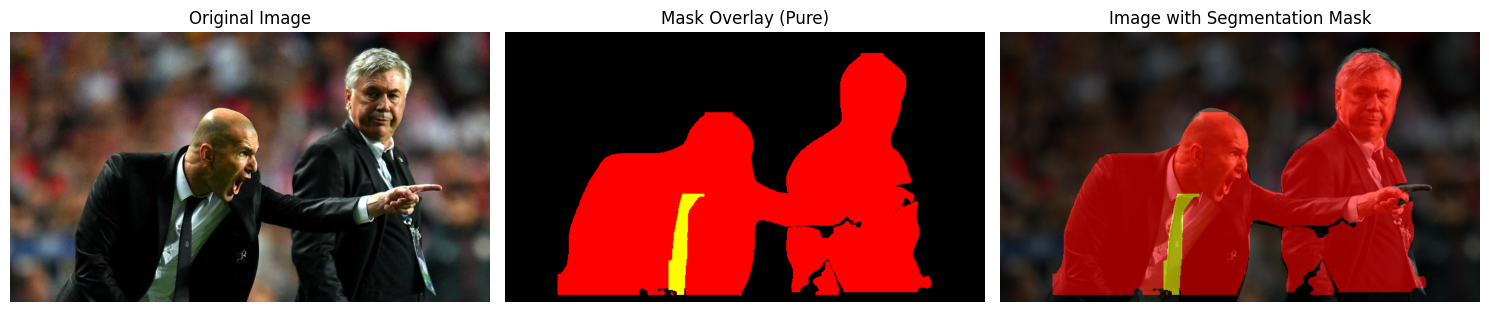

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt") 
img_path = "zidane.jpg"
results = model(img_path, conf=0.25)
result = results[0]

# 3. 读取原始图片并转换颜色空间
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 4. 创建掩码画布（与原图大小相同，初始全黑）
mask_overlay = np.zeros_like(img_rgb)

# 5. 遍历所有检测结果，绘制分割掩码
if result.masks is not None:
    # 获取所有掩码和对应的类别ID
    masks = result.masks.data.cpu().numpy()  # 转换为numpy数组 (n, h, w)
    boxes = result.boxes  # 获取检测框信息
    
    # 优化1：明确指定核心类别的颜色（高对比度），其余类别循环分配
    # 优先定义person、tie等常见类别，避免颜色冲突
    class_color_map = {
        0: [255, 0, 0],    # person（人）→ 纯红色（高对比度）
        27: [255, 255, 0]  # tie（领带）→ 黄色
    }
    # 备用颜色列表（其他类别循环使用）
    fallback_colors = [
        [0, 255, 0],    # 绿色
        [0, 0, 255],    # 蓝色
        [255, 0, 255],  # 洋红
        [0, 255, 255]   # 青色
    ]
    
    for i, mask in enumerate(masks):
        # 获取当前目标的类别ID和名称（便于调试）
        cls_id = int(boxes.cls[i].cpu().numpy())
        cls_name = model.names[cls_id]
        print(f"检测到：{cls_name} (ID={cls_id})")
        
        # 优化2：优先使用指定颜色，无指定则用备用颜色
        if cls_id in class_color_map:
            color = class_color_map[cls_id]
        else:
            color = fallback_colors[cls_id % len(fallback_colors)]
        
        # 将掩码缩放到原图尺寸
        mask = cv2.resize(mask, (img_rgb.shape[1], img_rgb.shape[0]))
        # 将掩码二值化（>0的区域为目标）
        mask = (mask > 0.5).astype(np.uint8)
        
        # 优化3：用累加（+=）替代赋值（=），避免多掩码覆盖
        for c in range(3):
            mask_overlay[:, :, c] += mask * color[c]

# 6. 叠加掩码到原图（调高透明度，增强视觉效果）
alpha = 0.6  # 从0.5调高到0.6，掩码更明显
overlay_img = cv2.addWeighted(img_rgb, 1 - alpha, mask_overlay, alpha, 0)

# 7. 显示结果（增加纯掩码图层，便于调试）
plt.figure(figsize=(15, 8))
# 子图1：原始图片
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# 新增子图：纯掩码图层（调试用）
plt.subplot(1, 3, 2)
plt.imshow(mask_overlay)
plt.title('Mask Overlay (Pure)')
plt.axis('off')

# 子图3：叠加掩码后的图片
plt.subplot(1, 3, 3)
plt.imshow(overlay_img)
plt.title('Image with Segmentation Mask')
plt.axis('off')

plt.tight_layout()
plt.show()



[255, 0, 0]
[255, 0, 0]
[255, 255, 0]


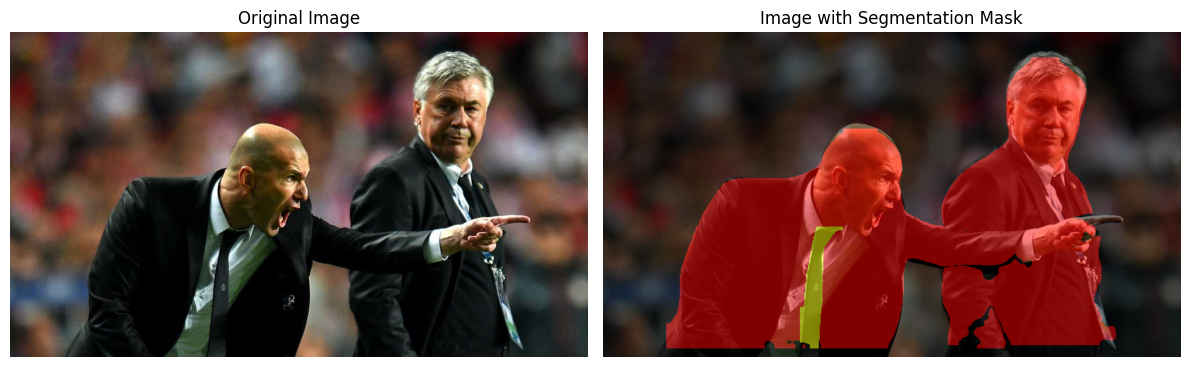

In [27]:
# 3. 读取原始图片并转换颜色空间（OpenCV默认BGR，matplotlib用RGB）
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 4. 创建掩码画布（与原图大小相同，初始全黑）
mask_overlay = np.zeros_like(img_rgb)

# 5. 遍历所有检测结果，绘制分割掩码
if result.masks is not None:
    # 获取所有掩码和对应的类别ID
    masks = result.masks.data.cpu().numpy()  # 转换为numpy数组 (n, h, w)
    boxes = result.boxes  # 获取检测框信息
    
    # 定义颜色映射（为不同类别分配不同颜色）
    colors = [
        [255, 0, 0],    # 红色
        [0, 255, 0],    # 绿色
        [0, 0, 255],    # 蓝色
        [255, 255, 0],  # 黄色
        [255, 0, 255],  # 洋红
        [0, 255, 255]   # 青色
    ]
    
    for i, mask in enumerate(masks):
        # 获取当前目标的类别ID
        cls_id = int(boxes.cls[i].cpu().numpy())
        # 选择颜色（循环使用颜色列表）
        color = colors[cls_id % len(colors)]
        # 将掩码缩放到原图尺寸（如果需要）
        mask = cv2.resize(mask, (img_rgb.shape[1], img_rgb.shape[0]))
        print(color)
        # 将掩码二值化（>0的区域为目标）
        mask = (mask > 0.5).astype(np.uint8)
        
        # 将颜色应用到掩码区域
        for c in range(3):
            mask_overlay[:, :, c] += mask * color[c]

# 6. 叠加掩码到原图（设置透明度）
alpha = 0.5  # 掩码透明度，0-1之间
overlay_img = cv2.addWeighted(img_rgb, 1 - alpha, mask_overlay, alpha, 0)

# 7. 显示结果
plt.figure(figsize=(12, 8))
# 子图1：原始图片
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# 子图2：叠加掩码后的图片
plt.subplot(1, 2, 2)
plt.imshow(overlay_img)
plt.title('Image with Segmentation Mask')
plt.axis('off')

plt.tight_layout()
plt.show()



单张图检测误差详细报告
真实目标总数: 3 | 预测目标总数: 3
正确检测数: 2 | 漏检数: 1 | 误检数: 1
精确率: 0.667 | 召回率: 0.667 | F1分数: 0.667

各类别检测状态:
类别: person | 真实存在: 1 | 预测检测: 1 | 状态: 正确检测
类别: car | 真实存在: 1 | 预测检测: 1 | 状态: 正确检测
类别: bike | 真实存在: 1 | 预测检测: 0 | 状态: 漏检
类别: dog | 真实存在: 0 | 预测检测: 1 | 状态: 误检
类别: cat | 真实存在: 0 | 预测检测: 0 | 状态: 无目标
类别: bus | 真实存在: 0 | 预测检测: 0 | 状态: 无目标


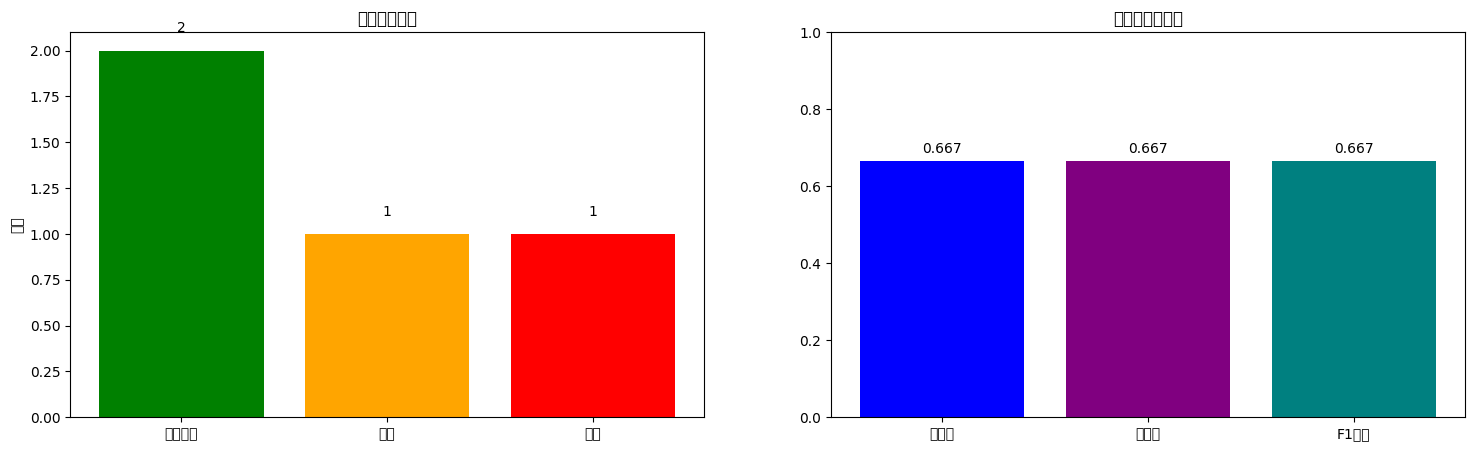

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class_names = ['person', 'car', 'bike', 'dog', 'cat', 'bus']
# 这张图的真实标注：实际存在的类别ID列表
gt_cls_ids = [0, 1, 2]  # 例：图中有人、车、自行车
# 模型预测结果：检测出的类别ID列表
pred_cls_ids = [0, 1, 3]  # 例：正确检测人、车，误检狗，漏检自行车



# --------------------------
# 3. 单张图的误差统计分析核心函数
# --------------------------
def analyze_single_image_error(gt_cls_ids, pred_cls_ids, class_names):
    """
    分析单张图的检测误差
    :param gt_cls_ids: 真实类别ID列表
    :param pred_cls_ids: 预测类别ID列表
    :param class_names: 类别名称列表
    """
    all_cls_ids = list(range(len(class_names)))
    # 构建GT和Pred的二值向量（1=存在/检测到，0=不存在/未检测到）
    gt_vec = [1 if c in gt_cls_ids else 0 for c in all_cls_ids]
    pred_vec = [1 if c in pred_cls_ids else 0 for c in all_cls_ids]

    # 计算单张图的各类别检测结果
    correct = 0  # 正确检测数
    false_positive = 0  # 误检数（不存在却检测到）
    false_negative = 0  # 漏检数（存在却未检测到）

    error_details = []
    for c_id, (gt, pred) in enumerate(zip(gt_vec, pred_vec)):
        cls_name = class_names[c_id]
        if gt == 1 and pred == 1:
            status = "正确检测"
            correct +=1
        elif gt == 1 and pred == 0:
            status = "漏检"
            false_negative +=1
        elif gt == 0 and pred == 1:
            status = "误检"
            false_positive +=1
        else:
            status = "无目标"
        error_details.append([cls_name, gt, pred, status])
    
    # 计算准确率指标（单张图）
    total_gt = sum(gt_vec)  # 真实目标总数
    if total_gt == 0:
        recall = 0.0
    else:
        recall = correct / total_gt  # 召回率（不漏检）
    
    total_pred = sum(pred_vec)  # 预测目标总数
    if total_pred == 0:
        precision = 0.0
    else:
        precision = correct / total_pred  # 精确率（不误检）
    
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) !=0 else 0.0

    # 打印详细结果
    print("="*50)
    print("单张图检测误差详细报告")
    print("="*50)
    print(f"真实目标总数: {total_gt} | 预测目标总数: {total_pred}")
    print(f"正确检测数: {correct} | 漏检数: {false_negative} | 误检数: {false_positive}")
    print(f"精确率: {precision:.3f} | 召回率: {recall:.3f} | F1分数: {f1:.3f}")
    print("\n各类别检测状态:")
    for detail in error_details:
        print(f"类别: {detail[0]} | 真实存在: {detail[1]} | 预测检测: {detail[2]} | 状态: {detail[3]}")

    # --------------------------
    # 4. 单张图的误差可视化
    # --------------------------
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # 子图1：各类别检测状态柱状图
    ax1 = axes[0]
    status_counts = {"正确检测": correct, "漏检": false_negative, "误检": false_positive}
    ax1.bar(status_counts.keys(), status_counts.values(), color=['green', 'orange', 'red'])
    ax1.set_title('检测结果分布')
    ax1.set_ylabel('数量')
    # 显示数值
    for k, v in status_counts.items():
        ax1.text(k, v+0.1, str(v), ha='center')

    # 子图2：精确率、召回率、F1分数对比
    ax2 = axes[1]
    metrics = ["精确率", "召回率", "F1分数"]
    values = [precision, recall, f1]
    ax2.bar(metrics, values, color=['blue', 'purple', 'teal'])
    ax2.set_title('检测准确率指标')
    ax2.set_ylim(0, 1.0)
    # 显示数值
    for m, v in zip(metrics, values):
        ax2.text(m, v+0.02, f"{v:.3f}", ha='center')

    
    return error_details, {"precision": precision, "recall": recall, "f1": f1}

# --------------------------
# 5. 运行主函数
# --------------------------
if __name__ == "__main__":
    
    
    
    # 2. 运行误差分析
    error_details, metrics = analyze_single_image_error(gt_cls_ids, pred_cls_ids, class_names)